## Problem Set 2: Linear Classifiers and Gradient Descent

### Overview
In this assignment, you will implement a simple linear classifier using both the SVM (hinge loss) and Softmax (cross-entropy loss) functions. You will also implement gradient descent to optimize the classifier. You will both complete this Python script (`ps2.ipynb`) and submit a LaTeX report (`ps2.tex` and `ps2.pdf`).

### Data
Use the following code to generate a dataset.

In [ ]:
# Generate spiral dataset

import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

### Task 1: Score Function
Implement a function to calculate the score function of a linear classifier.

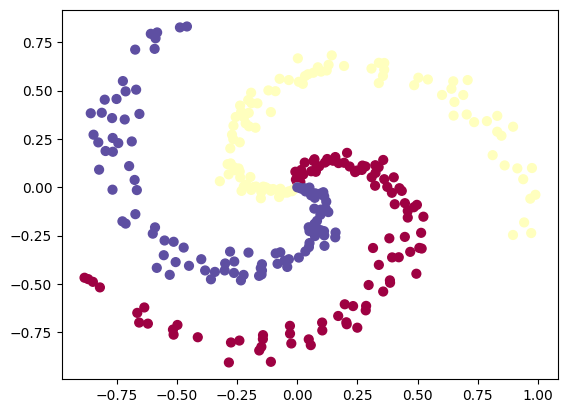

In [1]:
# Generate spiral dataset

import numpy as np
import matplotlib.pyplot as plt

N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D)) # data matrix (each row = single example)
y = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.show()

### Task 2: Loss Functions
Implement the following loss functions:
  1. SVM Classifier (Hinge Loss).
  2. Softmax Classifier (Cross-Entropy Loss).

In [8]:
import numpy as np

def svm_loss(scores, y):
    """
    Calculate the multiclass SVM loss for a single example.
    
    :param scores: numpy array of scores for each class (output of the classifier)
    :param y: integer, the correct class index
    :return: float, the loss for the input sample
    """
    correct_class_score = scores[y]
    margin = 1  # Delta
    losses = np.maximum(0, scores - correct_class_score + margin)
    losses[y] = 0  # Do not consider correct class in loss calculation
    return np.sum(losses)

# Example usage
scores = np.array([0.2, 0.4, 0.1])
y = 1  # The correct class
print("SVM Loss:", svm_loss(scores, y))

def softmax_loss(scores, y):
    """
    Calculate the cross-entropy loss using softmax for a single example.
    
    :param scores: numpy array of scores from the model for each class
    :param y: integer, the correct class index
    :return: float, the loss for the input sample
    """
    # Stability fix: shift values by subtracting max score from all scores
    shift_scores = scores - np.max(scores)
    exp_scores = np.exp(shift_scores)
    softmax_probabilities = exp_scores / np.sum(exp_scores)
    return -np.log(softmax_probabilities[y])

# Example usage
scores = np.array([0.2, 0.4, 0.1])
y = 1  # The correct class
print("Softmax Loss:", softmax_loss(scores, y))

SVM Loss: 1.5
Softmax Loss: 0.93983106084446


### Task 3: Regularization
Add L2 regularization to your loss function.

In [9]:
def softmax_loss_with_regularization(scores, y, W, lambda_reg):
    """
    Calculate the cross-entropy loss using softmax for a single example with L2 regularization.
    
    :param scores: numpy array of scores from the model for each class
    :param y: integer, the correct class index
    :param W: numpy array, weight matrix of the classifier
    :param lambda_reg: float, regularization strength
    :return: float, the regularized loss for the input sample
    """
    # Shift scores for numerical stability
    shift_scores = scores - np.max(scores)
    exp_scores = np.exp(shift_scores)
    softmax_probabilities = exp_scores / np.sum(exp_scores)
    cross_entropy_loss = -np.log(softmax_probabilities[y])
    
    # Compute the L2 regularization term
    l2_reg = lambda_reg * np.sum(W**2)
    
    # Combine cross-entropy loss with regularization term
    return cross_entropy_loss + l2_reg

# Example parameters
scores = np.array([0.2, 0.4, 0.1])
y = 1
W = np.array([[0.1, 0.2, 0.3], [0.4, 0.5, 0.6]])  # Example weight matrix
lambda_reg = 0.1  # Regularization strength

print("Softmax Loss with Regularization:", softmax_loss_with_regularization(scores, y, W, lambda_reg))

Softmax Loss with Regularization: 1.03083106084446


### Task 4: Gradient Descent
Implement gradient descent to minimize the loss function.

In [10]:
import numpy as np

def compute_softmax_loss_and_gradient(W, X, y, lambda_reg):
    # Compute scores
    scores = np.dot(X, W)
    shift_scores = scores - np.max(scores, axis=1, keepdims=True)
    exp_scores = np.exp(shift_scores)
    softmax_probabilities = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    # Compute loss
    correct_log_probs = -np.log(softmax_probabilities[range(num_examples), y])
    data_loss = np.sum(correct_log_probs) / num_examples
    reg_loss = 0.5 * lambda_reg * np.sum(W * W)
    loss = data_loss + reg_loss
    
    # Compute gradient
    dscores = softmax_probabilities
    dscores[range(num_examples), y] -= 1
    dscores /= num_examples
    dW = np.dot(X.T, dscores)
    dW += lambda_reg * W  # Regularization gradient
    
    return loss, dW

# Hyperparameters
learning_rate = 1e-2
num_iterations = 200
lambda_reg = 0.1

# Data: Assuming X (input features) and y (labels) are defined
num_examples, dim = X.shape
num_classes = np.max(y) + 1
W = 0.001 * np.random.randn(dim, num_classes)

# Gradient Descent Loop
for i in range(num_iterations):
    loss, grad = compute_softmax_loss_and_gradient(W, X, y, lambda_reg)
    W -= learning_rate * grad  # Update weights
    
    if i % 10 == 0:
        print(f'Iteration {i}, loss: {loss}')

# Print final results
print("Final loss:", loss)
print("Optimized weights:\n", W)

Iteration 0, loss: 0.6931460531457203
Iteration 10, loss: 0.6930982429993771
Iteration 20, loss: 0.6930521939833924
Iteration 30, loss: 0.6930078411478428
Iteration 40, loss: 0.6929651219393517
Iteration 50, loss: 0.6929239761127565
Iteration 60, loss: 0.6928843456460196
Iteration 70, loss: 0.692846174658261
Iteration 80, loss: 0.6928094093307987
Iteration 90, loss: 0.6927739978310933
Iteration 100, loss: 0.6927398902394838
Iteration 110, loss: 0.6927070384786195
Iteration 120, loss: 0.6926753962454858
Iteration 130, loss: 0.6926449189459308
Iteration 140, loss: 0.6926155636316029
Iteration 150, loss: 0.6925872889392072
Iteration 160, loss: 0.6925600550320018
Iteration 170, loss: 0.692533823543447
Iteration 180, loss: 0.6925085575229305
Iteration 190, loss: 0.6924842213834957
Final loss: 0.6924630855528088
Optimized weights:
 [[ 0.01613162 -0.01604425]
 [ 0.01966777 -0.02140543]]


### Task 5: LaTeX Write-Up
Document your approach and results using LaTeX. You should include the following sections:
  1. Introduction: Briefly describe the goal of the assignment.
  2. Methodology:
     - Explain the implementation of the score function.
     - Describe the hinge loss and softmax loss.
     - Discuss the regularization used.
     - Explain the gradient descent method you implemented.
  3. Results: Include any plots or results from your Python code.
  4. Conclusion: Summarize your findings and any challenges you faced.
